# Problem Statement:
Weather prediction is a crucial task in meteorology, agriculture, and disaster management. Traditional forecasting methods often struggle with accuracy due to complex weather patterns. This project aims to develop an Artificial Neural Network (ANN) model that utilizes historical weather data to predict future weather conditions, improving forecasting accuracy and reliability.

In [ ]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score,accuracy_score,f1_score,classification_report,confusion_matrix,recall_score
from keras.models import Sequential
from keras.layers import Dense,Dropout,BatchNormalization,LSTM
from keras.utils import to_categorical
from keras.optimizers import Adam
from tensorflow.keras import regularizers
from keras import callbacks
np.random.seed(0)

In [ ]:
df=pd.read_csv('weatherAUS.csv')
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [ ]:
df.shape

(145460, 23)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MinTemp,143975.0,12.194034,6.398495,-8.5,7.6,12.0,16.9,33.9
MaxTemp,144199.0,23.221348,7.119049,-4.8,17.9,22.6,28.2,48.1
Rainfall,142199.0,2.360918,8.478060,0.0,0.0,0.0,0.8,371.0
Evaporation,82670.0,5.468232,4.193704,0.0,2.6,4.8,7.4,145.0
Sunshine,75625.0,7.611178,3.785483,0.0,4.8,8.4,10.6,14.5
WindGustSpeed,135197.0,40.035230,13.607062,6.0,31.0,39.0,48.0,135.0
WindSpeed9am,143693.0,14.043426,8.915375,0.0,7.0,13.0,19.0,130.0
WindSpeed3pm,142398.0,18.662657,8.809800,0.0,13.0,19.0,24.0,87.0
Humidity9am,142806.0,68.880831,19.029164,0.0,57.0,70.0,83.0,100.0
Humidity3pm,140953.0,51.539116,20.795902,0.0,37.0,52.0,66.0,100.0


<ipython-input-52-c777c4265d75>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['RainTomorrow'],palette=['purple','blue'])


<Axes: xlabel='RainTomorrow', ylabel='count'>

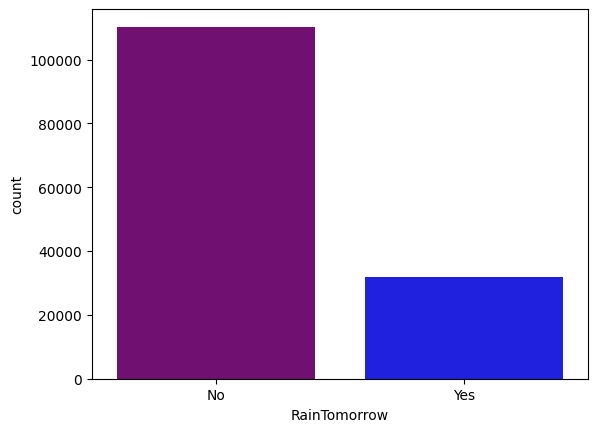

In [ ]:
sns.countplot(x=df['RainTomorrow'],palette=['purple','blue'])

In [ ]:
cat1_cols=df.dtypes=='object'
cat_cols =cat1_cols[cat1_cols].index
cat_cols=df[cat_cols]
cat_cols.head()

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,W,W,WNW,No,No
1,2008-12-02,Albury,WNW,NNW,WSW,No,No
2,2008-12-03,Albury,WSW,W,WSW,No,No
3,2008-12-04,Albury,NE,SE,E,No,No
4,2008-12-05,Albury,W,ENE,NW,No,No


In [ ]:
num_cols1=df.dtypes=='float'
num_cols=num_cols1[num_cols1].index
num_cols=df[num_cols]
num_cols.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
0,13.4,22.9,0.6,NaN,NaN,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8
1,7.4,25.1,0.0,NaN,NaN,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3
2,12.9,25.7,0.0,NaN,NaN,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2
3,9.2,28.0,0.0,NaN,NaN,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5
4,17.5,32.3,1.0,NaN,NaN,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7


<Axes: >

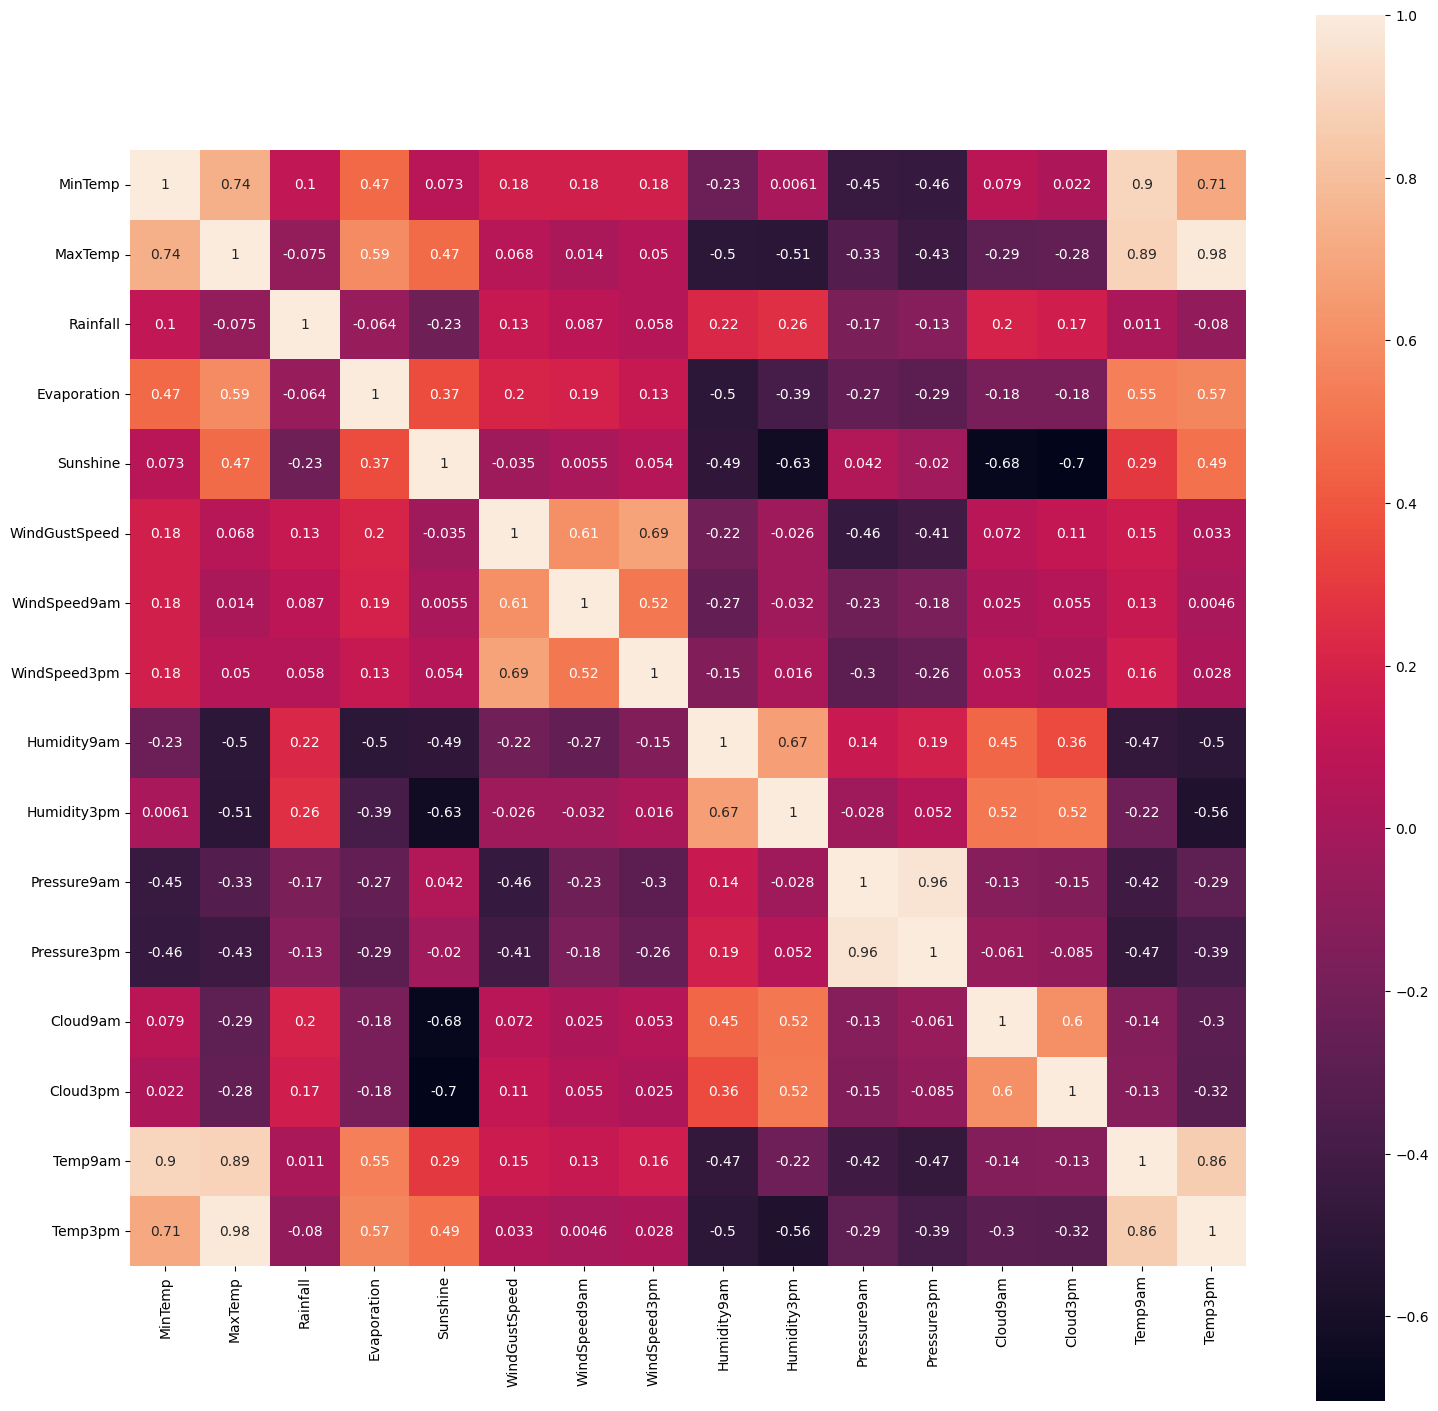

In [ ]:
df['Date']=pd.to_datetime(df['Date'])
plt.subplots(figsize=(18,18))
sns.heatmap(num_cols.corr(),annot=True,square=True)

In [ ]:
df['year']=df.Date.dt.year
df['months']=df.Date.dt.month
df['day']=df.Date.dt.day
df.tail()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,year,months,day
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,1020.3,NaN,NaN,10.1,22.4,No,No,2017,6,21
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,1019.1,NaN,NaN,10.9,24.5,No,No,2017,6,22
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,1016.8,NaN,NaN,12.5,26.1,No,No,2017,6,23
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,1016.5,3.0,2.0,15.1,26.0,No,No,2017,6,24
145459,2017-06-25,Uluru,14.9,NaN,0.0,NaN,NaN,NaN,NaN,ESE,...,1017.9,8.0,8.0,15.0,20.9,No,NaN,2017,6,25


In [ ]:
def encode(data, col, max_val):
  df[col+'_sin']=np.sin(2* np.pi * data[col]/max_val)
  df[col+'_cos']=np.cos(2* np.pi * data[col]/max_val)
  return df

df=encode(df, 'months', 12)
df=encode(df, 'day', 31)

In [ ]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Temp3pm,RainToday,RainTomorrow,year,months,day,months_sin,months_cos,day_sin,day_cos
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,21.8,No,No,2008,12,1,-2.449294e-16,1.0,0.201299,0.979530
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,24.3,No,No,2008,12,2,-2.449294e-16,1.0,0.394356,0.918958
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,23.2,No,No,2008,12,3,-2.449294e-16,1.0,0.571268,0.820763
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,26.5,No,No,2008,12,4,-2.449294e-16,1.0,0.724793,0.688967
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,29.7,No,No,2008,12,5,-2.449294e-16,1.0,0.848644,0.528964


Text(0, 0.5, 'days in a year')

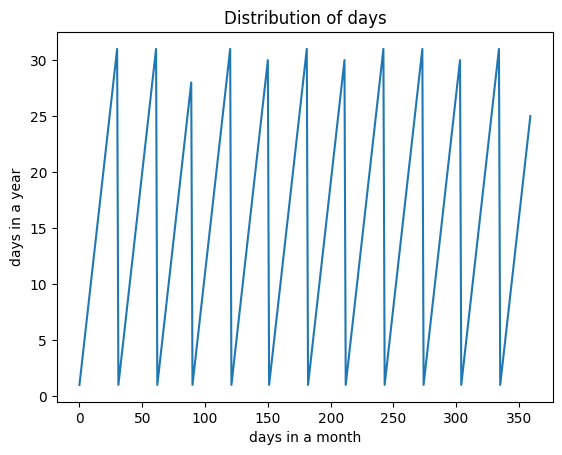

In [ ]:
year_data=df[:360]
days=year_data['day'].plot()
days.set_title('Distribution of days')
days.set_xlabel('days in a month')
days.set_ylabel('days in a year')

cyclic pattern: jan(1) is next month after the dec(12),that 12 will near to 1, it is not far

In the above graph we can see that there is no cyclic pattern

Splitting months and days into Sine and cosine combination provides the cyclical continuous feature

In [ ]:
print(df.shape)
df['months_sin'].shape

(145460, 30)


(145460,)

<Axes: xlabel='months_sin', ylabel='months_cos'>

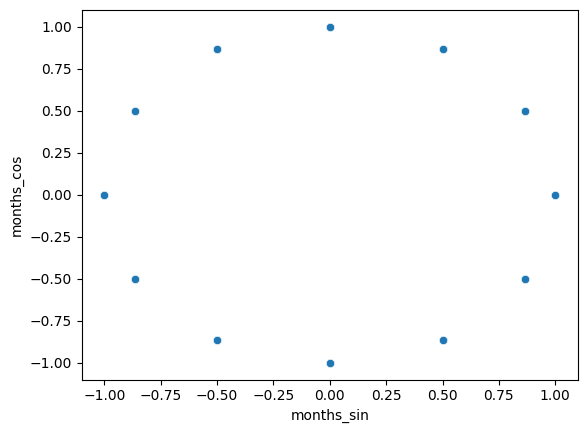

In [ ]:
sns.scatterplot(x='months_sin',y='months_cos',data=df)

<Axes: xlabel='day_sin', ylabel='day_cos'>

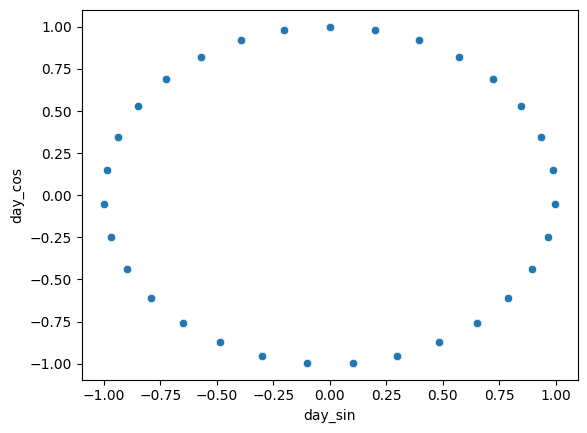

In [ ]:
sns.scatterplot(data=df,x='day_sin',y='day_cos')

In [ ]:
for i in cat_cols:
  print(i,df[i].isnull().sum())

Date 0
Location 0
WindGustDir 10326
WindDir9am 10566
WindDir3pm 4228
RainToday 3261
RainTomorrow 3267


In [ ]:
for i in cat_cols:
  df[i].fillna(df[i].mode()[0],inplace=True)

<ipython-input-64-49bbafcdff35>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[i].fillna(df[i].mode()[0],inplace=True)


In [ ]:
for i in cat_cols:
  print(i,df[i].isnull().sum())

Date 0
Location 0
WindGustDir 0
WindDir9am 0
WindDir3pm 0
RainToday 0
RainTomorrow 0


In [ ]:
for i in num_cols:
  print(i,df[i].isnull().sum())

MinTemp 1485
MaxTemp 1261
Rainfall 3261
Evaporation 62790
Sunshine 69835
WindGustSpeed 10263
WindSpeed9am 1767
WindSpeed3pm 3062
Humidity9am 2654
Humidity3pm 4507
Pressure9am 15065
Pressure3pm 15028
Cloud9am 55888
Cloud3pm 59358
Temp9am 1767
Temp3pm 3609


In [ ]:
for i in num_cols:
  df[i].fillna(df[i].median(),inplace=True)

<ipython-input-67-6618adbe3475>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[i].fillna(df[i].median(),inplace=True)


In [ ]:
for i in num_cols:
  print(i,df[i].isnull().sum())

MinTemp 0
MaxTemp 0
Rainfall 0
Evaporation 0
Sunshine 0
WindGustSpeed 0
WindSpeed9am 0
WindSpeed3pm 0
Humidity9am 0
Humidity3pm 0
Pressure9am 0
Pressure3pm 0
Cloud9am 0
Cloud3pm 0
Temp9am 0
Temp3pm 0


In [ ]:
encode=LabelEncoder()
for i in cat_cols:
  df[i]=encode.fit_transform(df[i])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 30 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  int64  
 1   Location       145460 non-null  int64  
 2   MinTemp        145460 non-null  float64
 3   MaxTemp        145460 non-null  float64
 4   Rainfall       145460 non-null  float64
 5   Evaporation    145460 non-null  float64
 6   Sunshine       145460 non-null  float64
 7   WindGustDir    145460 non-null  int64  
 8   WindGustSpeed  145460 non-null  float64
 9   WindDir9am     145460 non-null  int64  
 10  WindDir3pm     145460 non-null  int64  
 11  WindSpeed9am   145460 non-null  float64
 12  WindSpeed3pm   145460 non-null  float64
 13  Humidity9am    145460 non-null  float64
 14  Humidity3pm    145460 non-null  float64
 15  Pressure9am    145460 non-null  float64
 16  Pressure3pm    145460 non-null  float64
 17  Cloud9am       145460 non-nul

In [ ]:
x=df.drop(['Date','day', 'months'],axis=1)
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 27 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       145460 non-null  int64  
 1   MinTemp        145460 non-null  float64
 2   MaxTemp        145460 non-null  float64
 3   Rainfall       145460 non-null  float64
 4   Evaporation    145460 non-null  float64
 5   Sunshine       145460 non-null  float64
 6   WindGustDir    145460 non-null  int64  
 7   WindGustSpeed  145460 non-null  float64
 8   WindDir9am     145460 non-null  int64  
 9   WindDir3pm     145460 non-null  int64  
 10  WindSpeed9am   145460 non-null  float64
 11  WindSpeed3pm   145460 non-null  float64
 12  Humidity9am    145460 non-null  float64
 13  Humidity3pm    145460 non-null  float64
 14  Pressure9am    145460 non-null  float64
 15  Pressure3pm    145460 non-null  float64
 16  Cloud9am       145460 non-null  float64
 17  Cloud3pm       145460 non-nul

In [ ]:
col_names=list(x.columns)
stdscl=StandardScaler()
x=stdscl.fit_transform(x)
x=pd.DataFrame(x,columns=col_names)
x.head(10)

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,year,months_sin,months_cos,day_sin,day_cos
0,-1.531666,0.189757,-0.044575,-0.203581,-0.119472,0.14871,1.045228,0.307739,1.328766,1.366458,...,0.137693,-0.013506,0.019135,-0.529795,-0.529764,-1.879575,-0.016425,1.434192,0.278970,1.426023
1,-1.531666,-0.752786,0.265794,-0.275097,-0.119472,0.14871,1.258262,0.307739,-0.221338,1.586813,...,0.137693,0.033011,0.384064,-0.529795,-0.529764,-1.879575,-0.016425,1.434192,0.549587,1.339551
2,-1.531666,0.111212,0.350440,-0.275097,-0.119472,0.14871,1.471296,0.460168,1.328766,1.586813,...,-1.286294,0.622225,0.223495,-0.529795,-0.529764,-1.879575,-0.016425,1.434192,0.797572,1.199371
3,-1.531666,-0.470023,0.674917,-0.275097,-0.119472,0.14871,-0.872075,-1.216548,0.442992,-1.718521,...,0.137693,0.172562,0.705202,-0.529795,-0.529764,-1.879575,-0.016425,1.434192,1.012774,1.011221
4,-1.531666,0.833828,1.281548,-0.155903,-0.119472,0.14871,1.045228,0.079096,-1.328556,-0.176032,...,1.561680,0.126045,1.172312,-0.529795,-0.529764,-1.879575,-0.016425,1.434192,1.186382,0.782805
5,-1.531666,0.378265,0.914748,-0.251258,-0.119472,0.14871,1.258262,1.222312,1.328766,1.146102,...,0.137693,0.560202,1.055535,-0.529795,-0.529764,-1.879575,-0.016425,1.434192,1.311288,0.523473
6,-1.531666,0.331138,0.251687,-0.275097,-0.119472,0.14871,1.045228,0.765025,1.107323,1.146102,...,0.137693,0.172562,0.427856,-0.529795,-0.529764,-1.879575,-0.016425,1.434192,1.382379,0.243842
7,-1.531666,-0.705659,0.491517,-0.275097,-0.119472,0.14871,1.045228,-0.378190,0.664436,1.146102,...,0.137693,-0.106539,0.559231,-0.529795,-0.529764,-1.879575,-0.016425,1.434192,1.396744,-0.044639
8,-1.531666,-0.391478,1.225117,-0.275097,-0.119472,0.14871,-0.446007,3.051456,0.442992,-0.176032,...,0.137693,0.203573,1.245298,-0.529795,1.887635,-1.879575,-0.016425,1.434192,1.353796,-0.330159
9,-1.531666,0.142630,0.971179,-0.108226,-0.119472,0.14871,1.045228,-0.911691,0.221549,0.485035,...,0.137693,0.482674,0.953355,1.887521,-0.529764,-1.879575,-0.016425,1.434192,1.255292,-0.601030


In [ ]:
x['RainTomorrow'] = np.where(x['RainTomorrow'] > 0.5, 1, 0)  # Threshold to binary
print(x['RainTomorrow'].unique())  # Check again
x['RainToday'] = np.where(x['RainToday'] > 0.5, 1, 0)  # Threshold to binary
print(x['RainToday'].unique())  # Check again

[0 1]
[0 1]


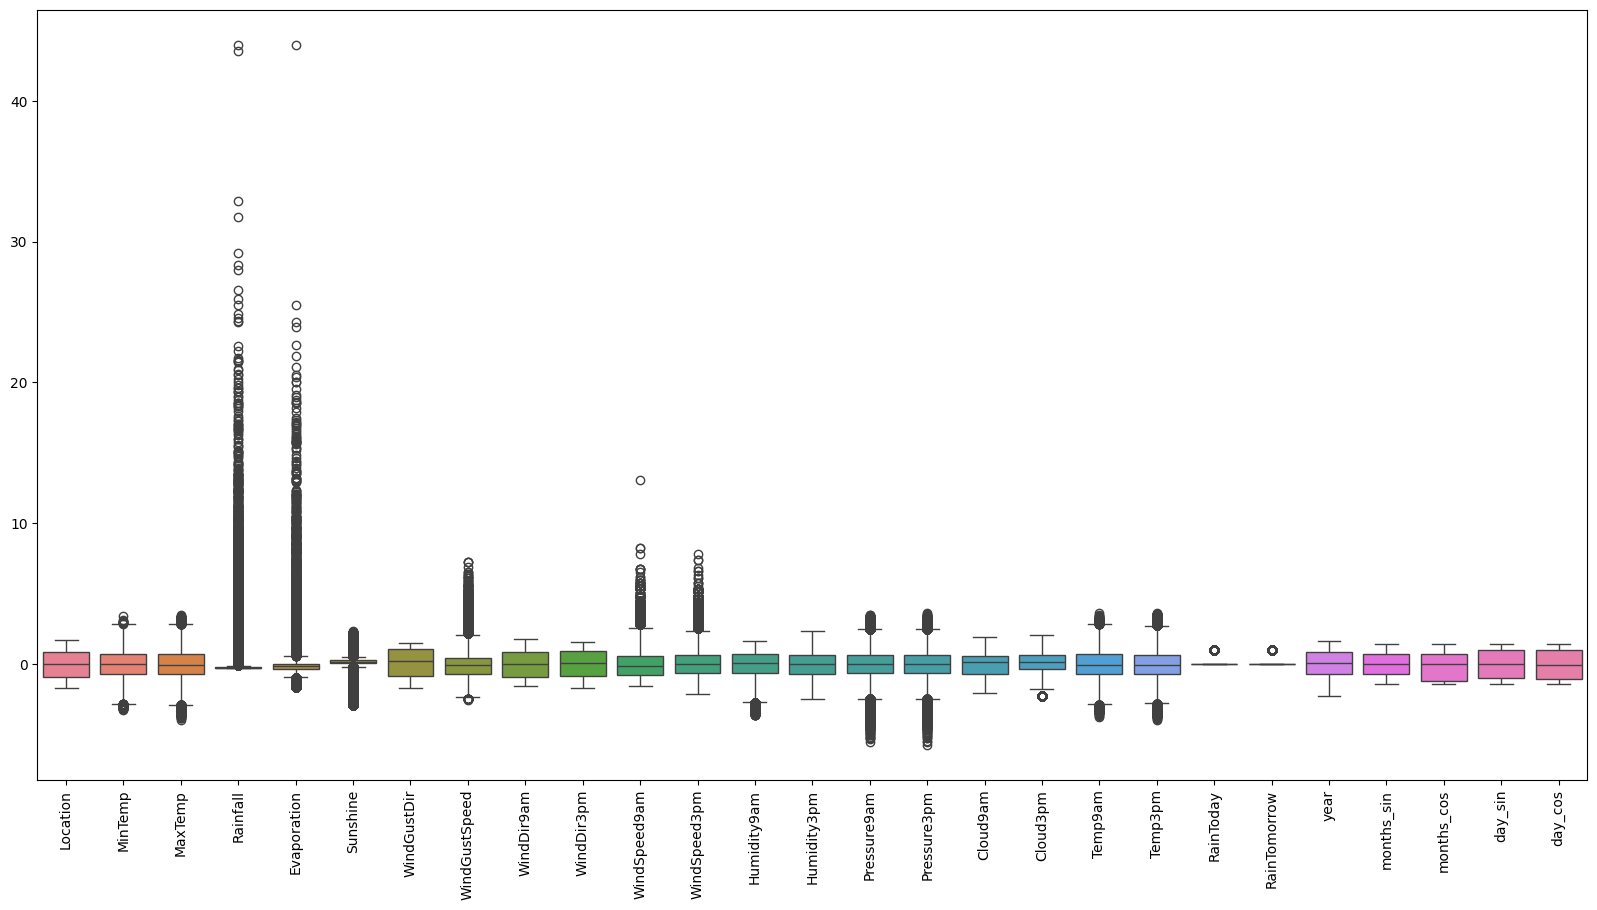

In [ ]:
plt.figure(figsize=(20,10))
sns.boxplot(x)
plt.xticks(rotation=90)
plt.show()

In [ ]:
x_cols=x.columns
x_cols=x_cols.drop(['RainToday','RainTomorrow'])
x_cols
for i in x_cols:
   Q1=x[i].quantile(0.25)
   Q3=x[i].quantile(0.75)
   IQR=Q3-Q1
   lower_bound=Q1-1.5*IQR
   upper_bound=Q3+1.5*IQR
   x=x[(lower_bound<=x[i]) & (upper_bound>=x[i])]

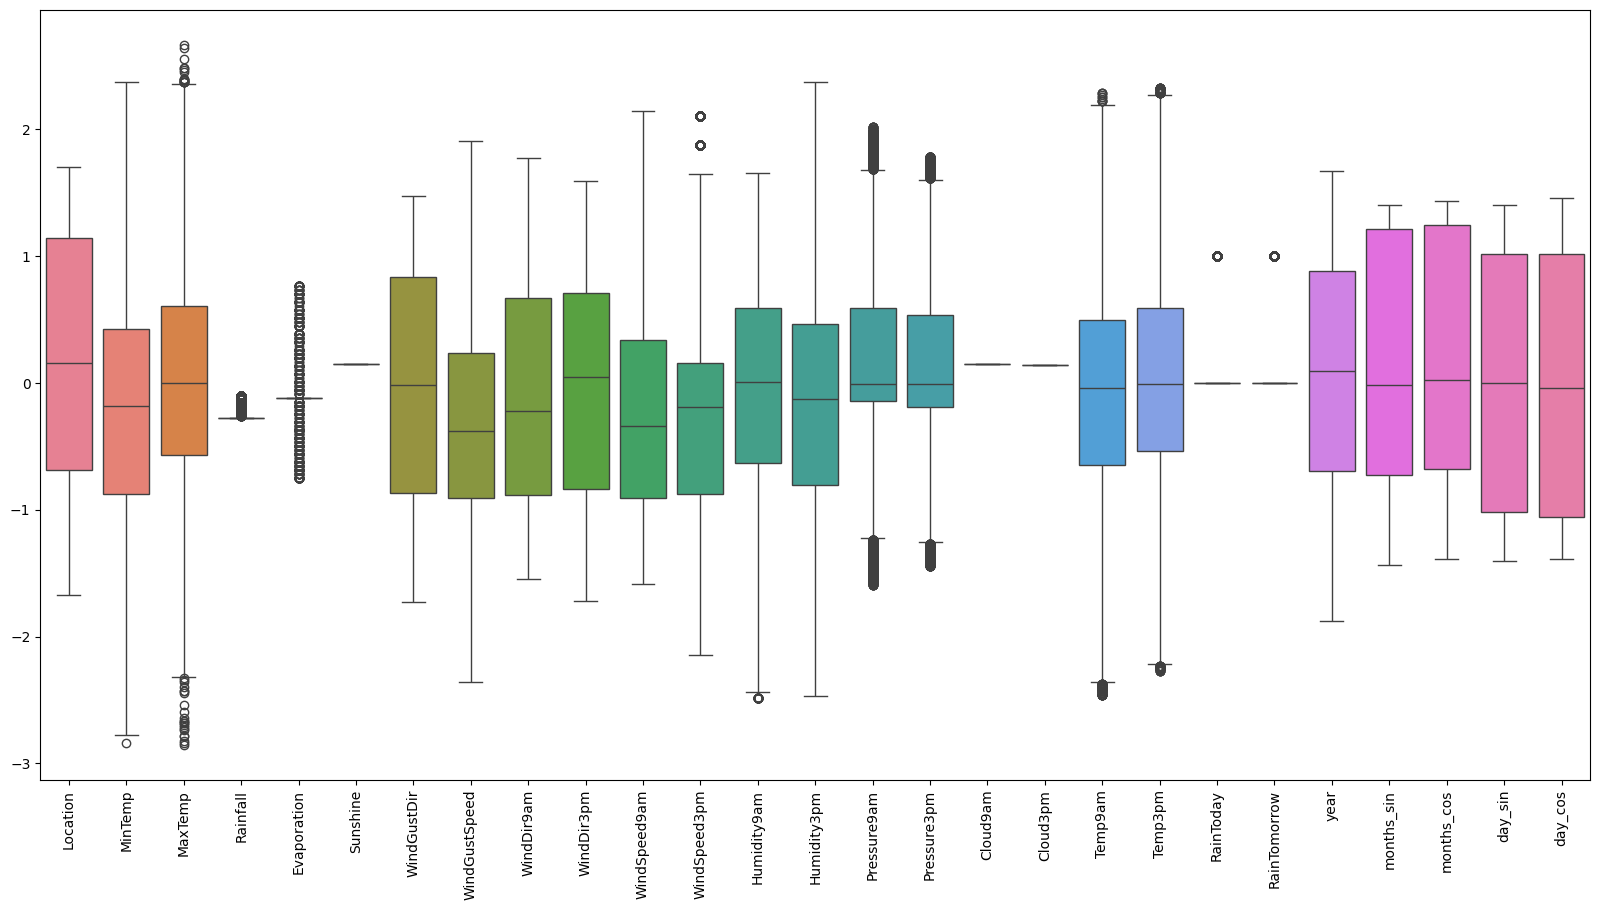

In [ ]:
plt.figure(figsize=(20,10))
sns.boxplot(x)
plt.xticks(rotation=90)
plt.show()

In [ ]:
# plt.figure(figsize=(20,10))
# sns.boxplot(y)
# plt.show()

In [ ]:
y=x['RainTomorrow']
x=x.drop(['RainTomorrow'],axis=1)

In [ ]:
print(x.shape)
print(y.shape)
# print(np.unique(y))
# y=pd.DataFrame(y)
# x=pd.DataFrame(x)

(29198, 26)
(29198,)


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
y_test.shape

(20438, 26)
(8760, 26)
(20438,)


(8760,)

In [ ]:
early_stop=callbacks.EarlyStopping(min_delta=0.001,patience=20,restore_best_weights=True)

model=Sequential()

model.add(Dense(units=32,kernel_initializer='uniform',activation='relu',input_dim=26))
model.add(Dense(units=32,kernel_initializer='uniform',activation='relu'))
model.add(Dense(units=16,kernel_initializer='uniform',activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(units=8,kernel_initializer='uniform',activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=1,kernel_initializer='uniform',activation='sigmoid'))

opt=Adam(learning_rate=0.00009)
model.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])

history=model.fit(x_train,y_train,batch_size=32,epochs=150,callbacks=[early_stop],validation_split=0.2)


Epoch 1/150


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


511/511 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8615 - loss: 0.6817 - val_accuracy: 0.8748 - val_loss: 0.4534
Epoch 2/150
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8702 - loss: 0.4215 - val_accuracy: 0.8748 - val_loss: 0.3220
Epoch 3/150
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8598 - loss: 0.3937 - val_accuracy: 0.8748 - val_loss: 0.3116
Epoch 4/150
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8711 - loss: 0.3668 - val_accuracy: 0.8748 - val_loss: 0.3096
Epoch 5/150
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8698 - loss: 0.3553 - val_accuracy: 0.8748 - val_loss: 0.3083
Epoch 6/150
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8694 - loss: 0.3595 - val_accuracy: 0.8748 - val_loss: 0.3076
Epoch 7/150
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8677 - loss: 0.3551 - val_accuracy: 0.8748 - val_loss: 0.3062
Epoch 8/150
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8694 - loss: 0.3558 - val_accuracy: 0.8748

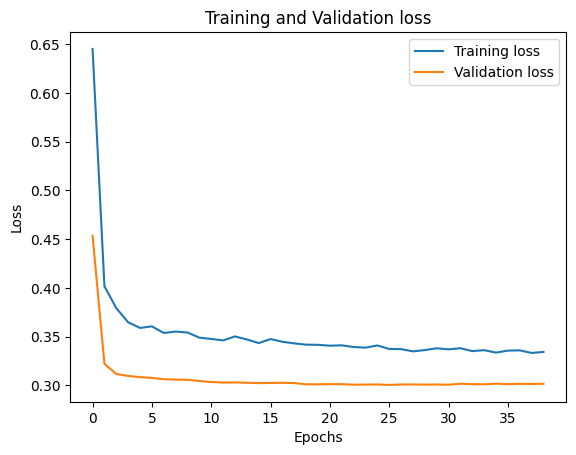

In [ ]:
history_df=pd.DataFrame(history.history)
plt.plot(history_df.loc[:, ['loss']], label='Training loss')
plt.plot(history_df.loc[:, ['val_loss']], label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc="best")

plt.show()

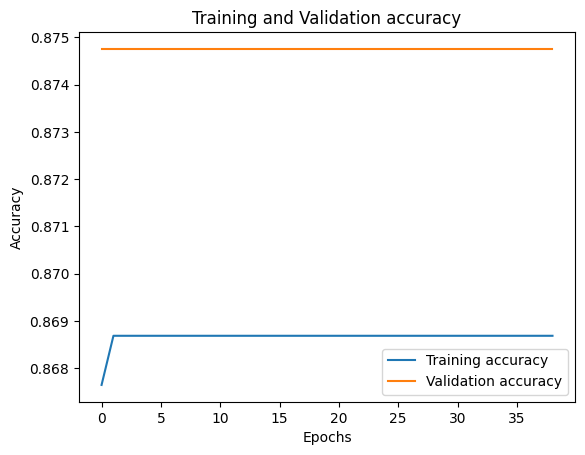

In [ ]:
history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['accuracy']],label='Training accuracy')
plt.plot(history_df.loc[:, ['val_accuracy']],label='Validation accuracy')

plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
y_pred=model.predict(x_test)

274/274 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [ ]:
# y_pred = (y_pred > 0.5) this will give boolean values as output
y_pred=(y_pred>= 0.5).astype(int)

In [ ]:
y_pred

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      1.00      0.93      7615
           1       0.00      0.00      0.00      1145

    accuracy                           0.87      8760
   macro avg       0.43      0.50      0.47      8760
weighted avg       0.76      0.87      0.81      8760



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# Conclusion

Data Processing and Preparation:
The project successfully handled missing values, outliers, and inconsistencies in the WeatherAUS dataset.
Feature selection techniques were applied to identify the most relevant weather attributes for accurate predictions.
Exploratory Data Analysis (EDA) revealed important weather trends and correlations among variables.

Model Development and Training:
An Artificial Neural Network (ANN) model was designed and trained using key weather parameters like temperature, humidity, wind speed, and rainfall.
The model was optimized by tuning hyperparameters such as the number of hidden layers, activation functions, and learning rate.
Training and validation were performed using appropriate data splitting techniques to prevent overfitting.

Performance Evaluation:
The model's performance was assessed using key metrics such as accuracy, mean squared error (MSE), and loss function analysis.
Comparisons with traditional machine learning models (e.g., Decision Trees, Random Forest) showed that ANN provided competitive results.The accuracy of the model indicates its potential for practical weather prediction applications.

Challenges and Limitations:
The model's accuracy was influenced by data quality, requiring robust preprocessing and handling of missing values.
ANN models require significant computational power and time for training, making real-time predictions challenging without further optimization.The dataset contained historical data, but real-time weather fluctuations might require continuous model updates for improved accuracy.

Future Enhancements:
Implementing advanced deep learning models such as CNNs or LSTMs for better time-series forecasting.
Integrating real-time weather data to improve model adaptability and performance.
Expanding the dataset to include more geographical locations for a globally applicable prediction system.

Final Thoughts:
This project successfully demonstrated the effectiveness of ANN in weather prediction, providing a data-driven approach to forecasting.The results indicate that neural networks can capture complex weather patterns, making them a viable alternative to traditional forecasting methods.
With further improvements, this model can be applied to meteorology, agriculture, and disaster management, aiding in better decision-making and preparedness.